## Breast Cancer Detection

#### Step-1_Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn.datasets

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-10-03 01:37:12.717532: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Step-2_Load Dataset from sklear.datasets

In this practice dataset, tumor characteristics of cell nuclei are derived from digitized images of fine needle aspirates of breast masses.
For each cell nucleus, ten real-valued features were calculated:

- **Radius**: The mean distance from the center to points on the perimeter.
- **Texture**: The standard deviation of gray-scale values.
- **Perimeter**: The total distance around the nucleus.
- **Area**: The surface area of the nucleus.
- **Smoothness**: The local variation in radius lengths.
- **Compactnes**
- **Concavity**: The severity of concave portions in the contour.
- **Concave Points**: The number of concave sections in the contour.
- **Symmetry**: The measure of how symmetrical the nucleus is.
- **Fractal Dimension**: A measure of complexity based on "coastline approximation" - 1.

In [2]:
dataset_breast_cancer = sklearn.datasets.load_breast_cancer()

dataset_breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

#### Step-3_Create a Dataframe

In [3]:
df = pd.DataFrame(dataset_breast_cancer.data, columns=dataset_breast_cancer.feature_names)
df['diagnosis'] = dataset_breast_cancer.target # where target value of 0 and 1 represent Benign and Malignant, respectively.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df['diagnosis'].value_counts(normalize=True)  

diagnosis
1    0.627417
0    0.372583
Name: proportion, dtype: float64

In [5]:
# mean_radius: mean of distances from center to points on the perimeter 
# mean_texture : mean of standard variation of gray-scale values
# mean_perimeter: 
# mean_area:
# mean_smoothness: mean of local variation in radius lengths
# mean_compactness: mean of perimeter^2 /area -1.0)
# mean_concavity: mean of severity of concave portions of the contour)
# mean_symmetry:
# mean fractal dimension (coasline approxmiation -1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

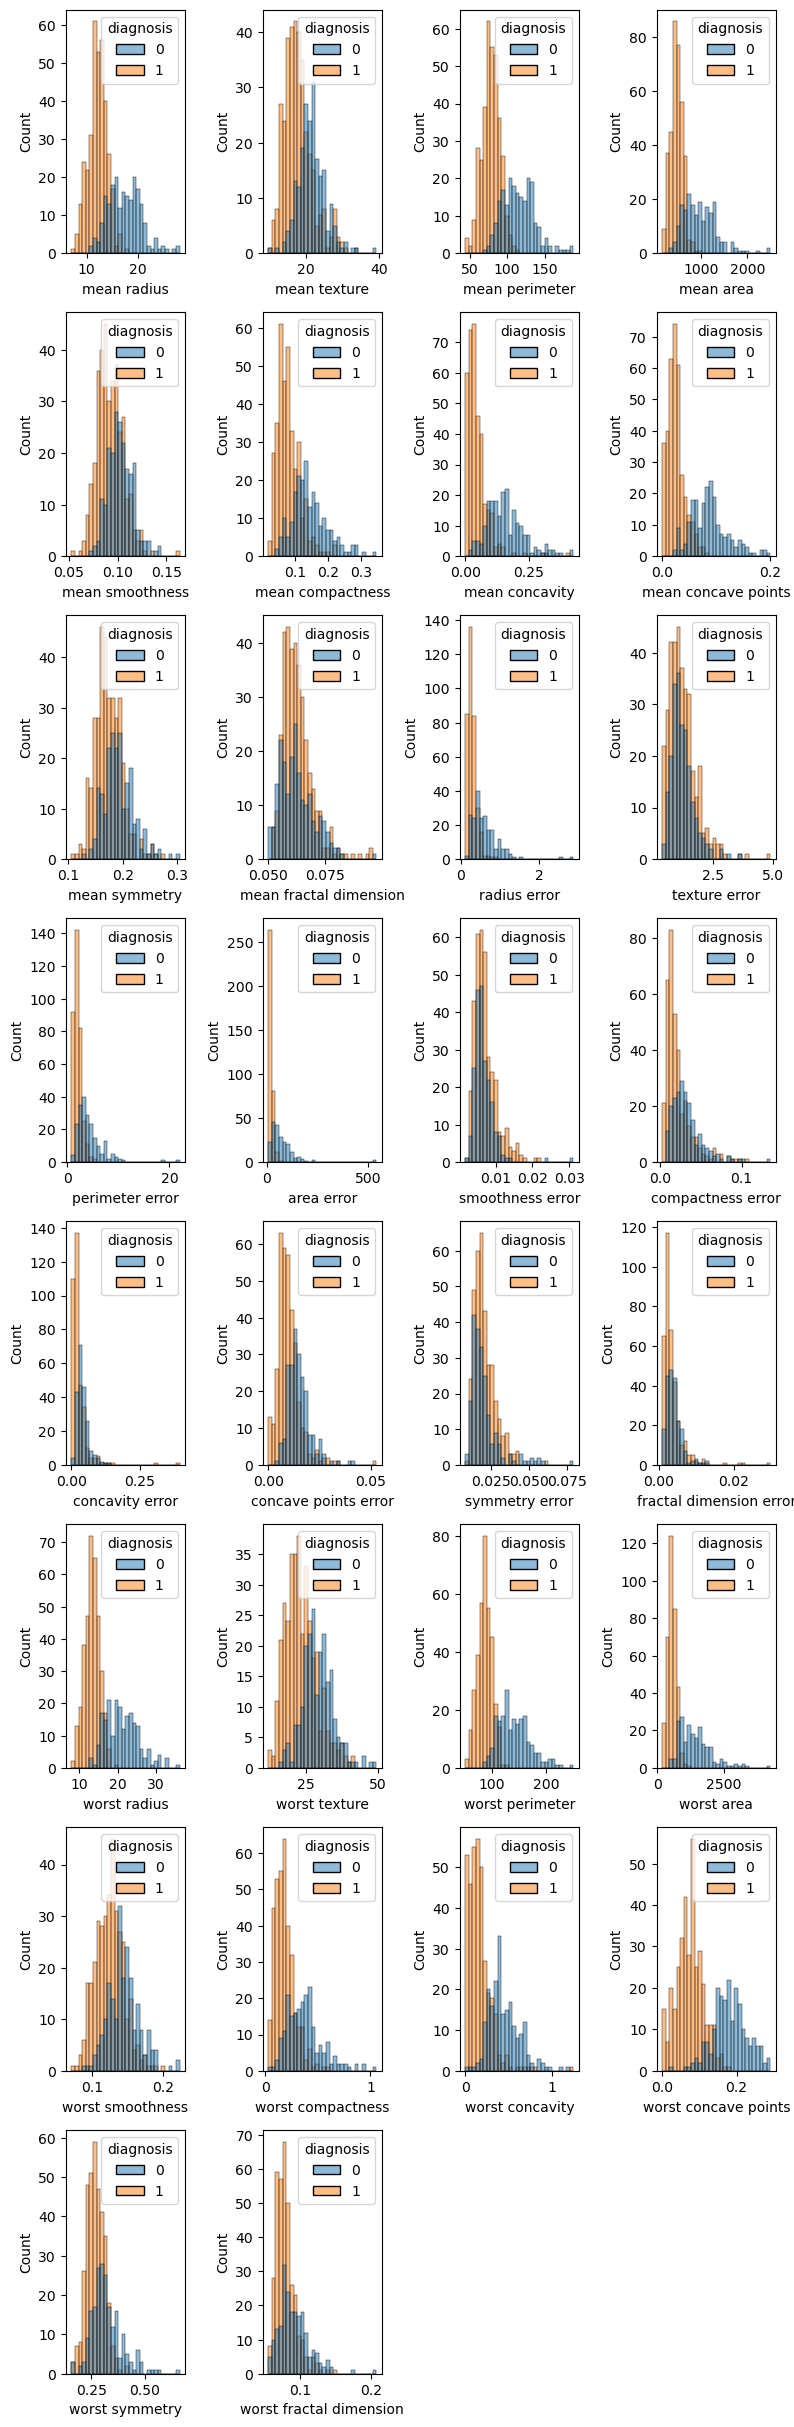

In [6]:
# Visualize tumor characteristic for positive and negative diagnoses

n_cols = len(df.columns)
n_rows = (n_cols // 4) + (n_cols % 4)

plt.figure(figsize=(8, n_rows * 3))
for i in range(len(df.columns)-1):
        plt.subplot(n_rows, 4, i+1)
        sns.histplot(data=df, x=df.columns[i], hue='diagnosis', bins=30)
        # plt.title('Histogram of ' + df.columns[i])
        plt.xlabel(df.columns[i])
plt.tight_layout()



In [7]:
df.groupby('diagnosis').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


<Axes: >

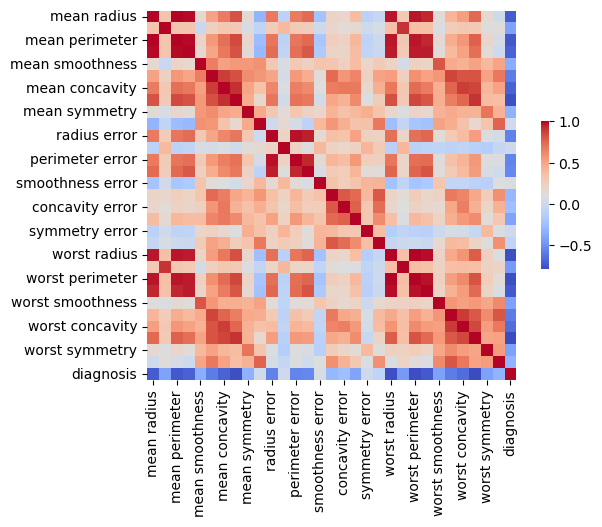

In [8]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .4})

In [9]:
X = df.drop(columns=['diagnosis'], axis=1) ## X represents variuos measurements related to the tumors
y = df['diagnosis']                        ## y indicates whether each tumor is Benign (0) or Malignant (1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # splitting the dataset into training and testing sets

In [11]:
y_train.value_counts()

diagnosis
1    285
0    170
Name: count, dtype: int64

In [12]:
y_test.value_counts()

diagnosis
1    72
0    42
Name: count, dtype: int64

##### In the dataset, some values are significantly higher than others, which are near zero. To ensure that all features contribute equally to the training model, it is essential to apply a scaling technique

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Our dataset contains 30 features. To better understand the structure of the data, we can use Principal Component Analysis (PCA) to reduce these features to 2 or 3 principal components, facilitating easier visualization through plotting.

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

X_train_pca.shape

(455, 2)

In [15]:
X_train_pca[:, 0]

array([-4.16725097,  4.59726035, -4.56432721, -0.88369256, -2.95139888,
        0.39925335, -2.56346792, -5.53364974, -2.09285115, -1.05177485,
       -2.41996593, -1.35189462,  0.78100759, -3.31948668,  3.43780611,
       -1.86878628,  4.02215535, -2.39194356,  1.36677162,  7.33894262,
       -2.12385576, -2.57928456, -2.63262659,  4.10089699, -1.80766371,
       -1.81913479, -1.12926666,  9.33923819, -3.70520967,  0.16012656,
       -1.15356358,  8.73379333, -3.18530179, -1.73894061,  3.29036463,
        1.42146588, 11.0592197 , -0.12545858,  6.30940295, -2.38611661,
       -1.96867901, -4.04747558, -0.69429905, -0.41472691,  2.44773896,
       -1.65654687, -2.16437428,  0.62256544, -2.89384978,  1.66380549,
        2.4437297 ,  4.7518233 ,  1.20240612, -1.16698669, -4.6108255 ,
       -3.06971067, -2.09208776,  1.29207696, -0.37461986,  0.34839798,
       -2.55040565, -3.3754853 ,  5.5121416 ,  2.30730848, -0.63851876,
       -4.38413652,  6.71379686, -2.05842912, -2.74359698, -0.90

Text(0, 0.5, 'Second Principal Component')

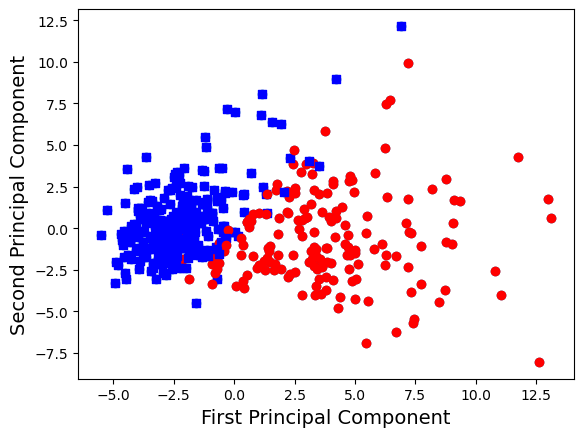

In [16]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:,1])


idata = {'marker': ['o', 's'],
         'color': ['red', 'blue'],
         'itarget': ['Malignant', 'Benign']
         }

for i, label in enumerate(y_train):
    plt.scatter(X_train_pca[i, 0], X_train_pca[i, 1], 
                marker=idata['marker'][label], 
                color=idata['color'][label])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)

In [17]:
# Define parameters for optimization using dictionaries {parameter name: parameter list}

SVM_params = {'C':[0.001, 0.1, 10, 100], 'kernel':['rbf' ,'linear', 'poly', 'sigmoid']}
LR_params = {'C':[0.001, 0.1, 1, 10, 100]}
LDA_params = {'n_components':[None, 1,2,3], 'solver':['svd'], 'shrinkage':[None]}
KNN_params = {'n_neighbors':[1,5,10,20], 'p':[2], 'metric':['minkowski']}
RF_params = {'n_estimators':[10,50,100, 200]}
DTC_params = {'criterion':['entropy'], 'max_depth':[10, 50, 100]}
BNB_params = {'alpha':[1,10]}
BAG_params = BAG_params = {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 1.0], 'max_features': [0.5, 1.0]}
ADA_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]}
GB_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
ET_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5]}

models_opt = []

models_opt.append(('LR', LogisticRegression(), LR_params))
models_opt.append(('LDA', LinearDiscriminantAnalysis(), LDA_params))
models_opt.append(('KNN', KNeighborsClassifier(),KNN_params))
models_opt.append(('DTC', DecisionTreeClassifier(), DTC_params))
models_opt.append(('RFC', RandomForestClassifier(), RF_params))
models_opt.append(('SVM', SVC(), SVM_params))
models_opt.append(('NB', BernoulliNB(), BNB_params))

In [18]:
results = []

for name, model, params in models_opt:
    grid_search = GridSearchCV(estimator=model,
                               param_grid=params,
                               cv=5,
                               scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    results.append((name, grid_search.best_params_, accuracy))


results_df = pd.DataFrame(results, columns=['Models', 'Best Parameters', 'Accuracy'])
rename_dict = {
    'LR': 'Logistic Regression',
    'KNN': 'K-Nearest Neighbor',
    'LDA': 'Linear Discriminant Analysis',
    'DTC': 'Decision Tree Classifier',
    'RFC': 'Random Forest Classifier',
    'SVM': 'Support Vector Machine',
    'NB': 'Naive Bayes (Bernoulli)'
}
results_df['Models'] = results_df['Models'].replace(rename_dict)

best_model_info = results_df.loc[results_df['Accuracy'].idxmax()]
print('\nBest Model: ', best_model_info)



Best Model:  Models                     Support Vector Machine
Best Parameters    {'C': 0.1, 'kernel': 'linear'}
Accuracy                                 0.982456
Name: 5, dtype: object


In [19]:
results_df

,Models,Best Parameters,Accuracy
0,Logistic Regression,{'C': 0.1},0.973684
1,Linear Discriminant Analysis,"{'n_components': None, 'shrinkage': None, 'sol...",0.956140
2,K-Nearest Neighbor,"{'metric': 'minkowski', 'n_neighbors': 5, 'p': 2}",0.956140
3,Decision Tree Classifier,"{'criterion': 'entropy', 'max_depth': 10}",0.912281
4,Random Forest Classifier,{'n_estimators': 200},0.956140
5,Support Vector Machine,"{'C': 0.1, 'kernel': 'linear'}",0.982456
6,Naive Bayes (Bernoulli),{'alpha': 1},0.929825


In [20]:
def create_iNN(input_dim):
    imodel = Sequential() # Creation of a new neural network
    imodel.add(Dense(50, activation='relu', input_shape=input_dim)) 
    imodel.add(Dropout(0.2)) # used to decrease the chance of overfitting (20% of input neurons are zeroed)
    imodel.add(Dense(25, activation='relu'))
    imodel.add(Dropout(0.2))
    # imodel.add(Dense(10, activation='relu'))
    # imodel.add(Dropout(0.2))
    imodel.add(Dense(1, activation='sigmoid'))

    imodel.compile(optimizer='Adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
    return imodel

In [21]:
imodel = create_iNN(input_dim=(X_train_scaled.shape[1], ))
imodel.fit(X_train_scaled, y_train, batch_size=50, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.7626
Epoch 2/150
10/10 [==============================] - 0s 777us/step - loss: 0.3614 - accuracy: 0.9033
Epoch 3/150
10/10 [==============================] - 0s 966us/step - loss: 0.2598 - accuracy: 0.9165
Epoch 4/150
10/10 [==============================] - 0s 742us/step - loss: 0.2026 - accuracy: 0.9407
Epoch 5/150
10/10 [==============================] - 0s 729us/step - loss: 0.1784 - accuracy: 0.9538
Epoch 6/150
10/10 [==============================] - 0s 683us/step - loss: 0.1547 - accuracy: 0.9451
Epoch 7/150
10/10 [==============================] - 0s 918us/step - loss: 0.1310 - accuracy: 0.9538
Epoch 8/150
10/10 [==============================] - 0s 678us/step - loss: 0.1323 - accuracy: 0.9495
Epoch 9/150
10/10 [==============================] - 0s 710us/step - loss: 0.1202 - accuracy: 0.9582
Epoch 10/150
10/10 [==============================] - 0s 698us/step - loss: 0.1128 - accuracy

In [22]:
loss_NN, accuracy_NN = imodel.evaluate(X_test_scaled, y_test)


4/4 [==============================] - 0s 1ms/step - loss: 0.1598 - accuracy: 0.9561


In [23]:
y_pred = imodel.predict(X_test_scaled)

y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 865us/step


<Axes: >

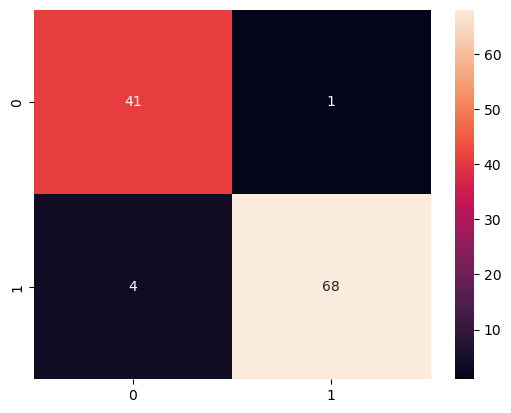

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [25]:
accuracy_NN = pd.DataFrame({'Models': ['Neural Network'], 'Accuracy': [accuracy_NN]})

results_df.drop(columns=['Best Parameters'], inplace=True)

accuracy_scores = pd.concat([results_df, accuracy_NN], ignore_index=True)

accuracy_scores

,Models,Accuracy
0,Logistic Regression,0.973684
1,Linear Discriminant Analysis,0.956140
2,K-Nearest Neighbor,0.956140
3,Decision Tree Classifier,0.912281
4,Random Forest Classifier,0.956140
5,Support Vector Machine,0.982456
6,Naive Bayes (Bernoulli),0.929825
7,Neural Network,0.956140


(0.8, 1.0)

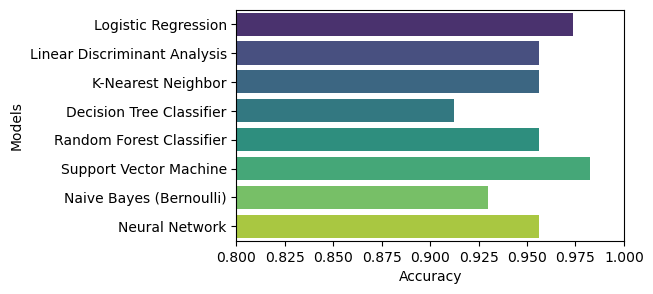

In [26]:
plt.figure(figsize=(5, 3))
sns.barplot(x='Accuracy', y='Models', data=accuracy_scores, palette='viridis')
plt.xlim(0.8, 1.0)